In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("C:\\Users\\saeed\\OneDrive\\Desktop\\SWAP DATA.xlsx")

<AxesSubplot:title={'center':'swap rates from 2001 to 2016'}, xlabel='YEAR', ylabel='Rates in percents'>

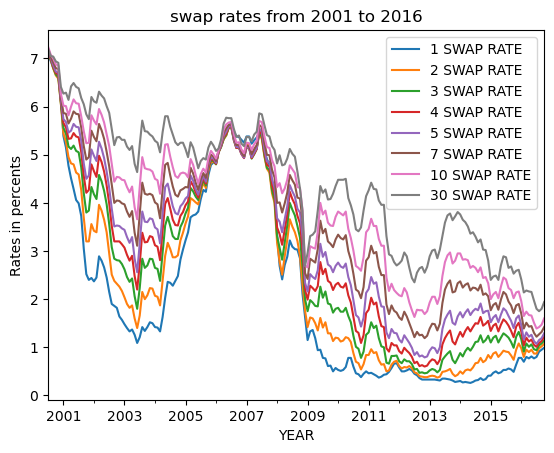

In [2]:
# Annual swap rates
annual_data = data.set_index("YEAR")
annual_data.resample('Y').mean()
annual_data.plot(title = "swap rates from 2001 to 2016", ylabel = "Rates in percents")

In [3]:
annual_data.tail(10)

,1 SWAP RATE,2 SWAP RATE,3 SWAP RATE,4 SWAP RATE,5 SWAP RATE,7 SWAP RATE,10 SWAP RATE,30 SWAP RATE
YEAR,,,,,,,,
2016-01-01,0.78,0.98,1.17,1.33,1.46,1.70,1.96,2.41
2016-02-01,0.70,0.80,0.91,1.04,1.16,1.39,1.65,2.14
2016-03-01,0.80,0.95,1.08,1.20,1.31,1.51,1.74,2.18
2016-04-01,0.77,0.90,1.01,1.12,1.22,1.43,1.67,2.16
2016-05-01,0.81,0.95,1.06,1.16,1.26,1.44,1.66,2.15
2016-06-01,0.77,0.87,0.96,1.05,1.13,1.30,1.51,1.97
2016-07-01,0.80,0.87,0.94,1.01,1.07,1.22,1.39,1.80
2016-08-01,0.91,0.98,1.04,1.09,1.15,1.27,1.42,1.75
2016-09-01,0.95,1.02,1.08,1.13,1.19,1.32,1.47,1.80


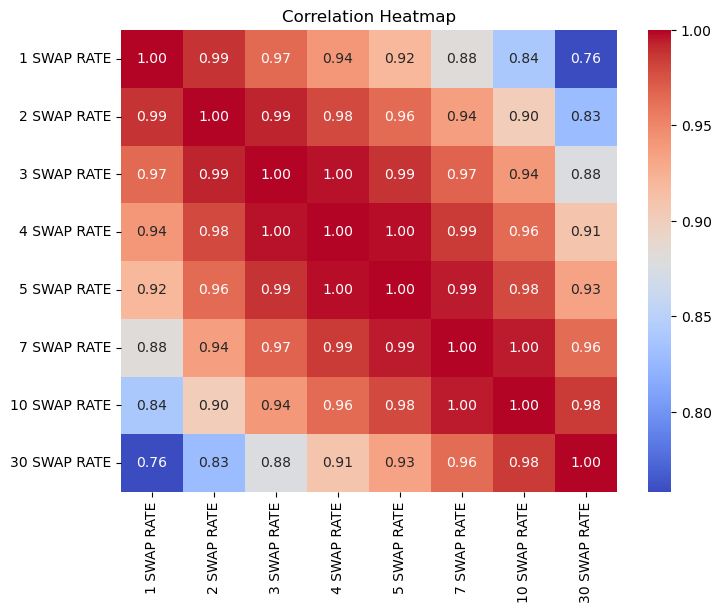

In [4]:
# Plot correlation heatmap
correlation_matrix = data.iloc[:,1:].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# Import PCA from sklearn library and choose a model with 3 new factor drivers
from sklearn.decomposition import PCA
input_pca = data.select_dtypes(include=['float64'])
pca_1 = PCA(n_components = 3)
pca_1.fit(input_pca)
pc_df = pd.DataFrame(principal_components, columns=input_pca.columns)

# From the model, extract the new principal components, explained variance by the new componenets both in numbers and percents
principal_components = pca_1.components_
explained_v = pca_1.explained_variance_
perc_explained_var = pca_1.explained_variance_ratio_

In [8]:
# Add columns to see explained variances

new_index_names = {0: 'factor 1', 1: 'factor 2', 2: 'factor 3'}
pc_df = pc_df.rename(index=new_index_names)


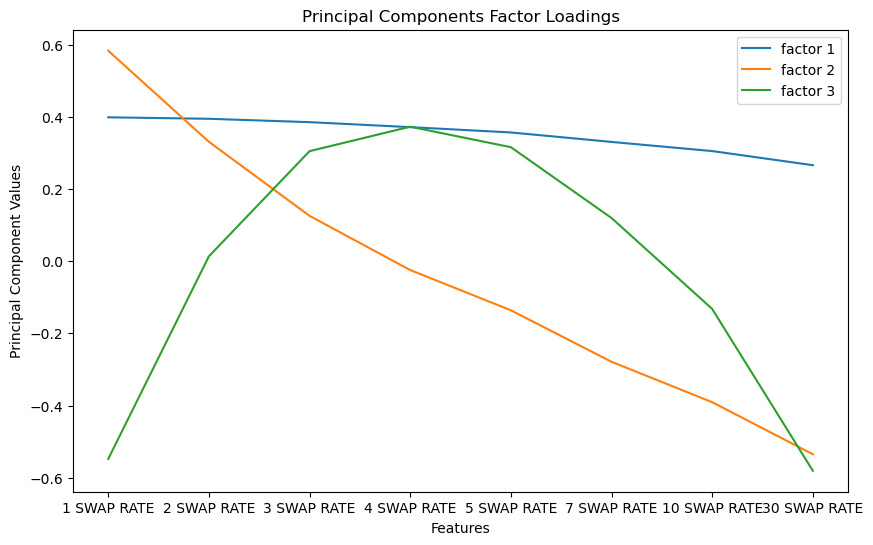

In [9]:
# Plot the principal components discreetly as line graphs
plt.figure(figsize=(10, 6))
for component in pc_df.index:
    plt.plot(pc_df.columns, pc_df.loc[component], label=component)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Principal Component Values')
plt.title('Principal Components Factor Loadings')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [10]:
#Get the loadings matrix
loadings_matrix = pd.DataFrame(pca_1.components_.T, columns=[f'PC{i}' for i in range(1, 3 + 1)], index=pc_df.columns)
loadings_matrix

,PC1,PC2,PC3
1 SWAP RATE,0.398429,0.582840,-0.547715
2 SWAP RATE,0.394301,0.330604,0.013393
3 SWAP RATE,0.385009,0.125479,0.304644
4 SWAP RATE,0.371193,-0.024611,0.372368
5 SWAP RATE,0.356474,-0.136034,0.315685
7 SWAP RATE,0.330262,-0.278681,0.119623
10 SWAP RATE,0.304892,-0.390570,-0.132225
30 SWAP RATE,0.265819,-0.534728,-0.580442


In [11]:
# Calculate the variance explained by each original feature for each principal component
variance_explained_2d = loadings_matrix ** 2 * pca_1.explained_variance_

# Calculate the total variance for each swap rate
total_variance = variance_explained_2d.sum(axis=1)

# Convert each variance to percent of total variance for each swap rate
variance_explained_percent = variance_explained_2d.div(total_variance, axis=0) * 100

# Add a new column representing the cumulative variance explained by rows
variance_explained_percent['Cumulative Row Variance'] = variance_explained_percent.sum(axis=1)

# Display the DataFrame
variance_explained_percent

,PC1,PC2,PC3,Cumulative Row Variance
1 SWAP RATE,90.541404,8.911296,0.547300,100.0
2 SWAP RATE,96.867535,3.132107,0.000357,100.0
3 SWAP RATE,99.315906,0.485195,0.198899,100.0
4 SWAP RATE,99.659051,0.020151,0.320799,100.0
5 SWAP RATE,99.087752,0.663680,0.248567,100.0
7 SWAP RATE,96.789648,3.169734,0.040618,100.0
10 SWAP RATE,92.930180,7.013913,0.055906,100.0
30 SWAP RATE,83.238293,15.492192,1.269514,100.0


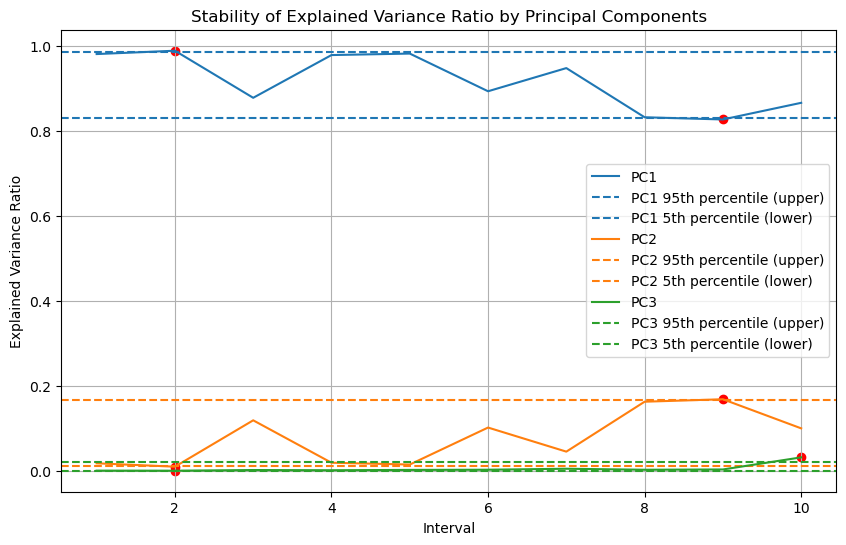

In [13]:
# Divide the data into chunks of intervals and perform PCA on each to compare how stable are these parameters over time

# Define the number of intervals
num_intervals = 10
interval_length = len(data) // num_intervals

# Initialize lists to store variance explained for each interval
variance_explained_list = []

# Loop through each interval
for i in range(num_intervals):
    # Partition the data into intervals
    interval_data = data[i * interval_length : (i + 1) * interval_length]

    # Perform PCA on the interval data
    pca = PCA(n_components=3)
    input_pca = interval_data.select_dtypes(include=['float64'])
    pca.fit(input_pca)

    # Store the explained variance ratio for each principal component
    variance_explained_list.append(pca.explained_variance_ratio_)

# Create a DataFrame to store explained variance ratio for each principal component and interval
variance_explained_df = pd.DataFrame(variance_explained_list, columns=[f'PC{i+1}' for i in range(3)])

# Calculate the upper and lower percentiles for each principal component
upper_percentiles = variance_explained_df.quantile(0.95)
lower_percentiles = variance_explained_df.quantile(0.05)

# Plot the explained variance ratio for each principal component across intervals
plt.figure(figsize=(10, 6))
for i, pc in enumerate(variance_explained_df.columns):
    plt.plot(range(1, num_intervals + 1), variance_explained_df[pc], label=pc)

    # Plot double-sided 95th percentile lines with dotted lines
    plt.axhline(y=upper_percentiles[pc], linestyle='--', color=f'C{i}', label=f'{pc} 95th percentile (upper)')
    plt.axhline(y=lower_percentiles[pc], linestyle='--', color=f'C{i}', label=f'{pc} 5th percentile (lower)')

    # Highlight points exceeding upper and lower percentiles with red markers
    for interval, ratio in enumerate(variance_explained_df[pc]):
        if ratio > upper_percentiles[pc] or ratio < lower_percentiles[pc]:
            plt.scatter(interval + 1, ratio, color='red', marker='o')

plt.xlabel('Interval')
plt.ylabel('Explained Variance Ratio')
plt.title('Stability of Explained Variance Ratio by Principal Components')
plt.legend()
plt.grid(True)
plt.show()

